In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

### Задание

Имеется датасет оценок студентов, полученных ими на различных аттестационных испытаниях, совместно с описательной информацией по каждому студенту.

Необходимо проверить критерием Хи-квадрат наличие зависимостей между 3-мя различными парами параметров:

1. Параметры 'race/ethnicity' и 'math score';
2. Параметры 'test preparation course' и 'math score';
3. Параметры 'gender' и 'math score'.

Для решения задач применять такое разбиение количественных данных, которое считаете нужным (это же относится к возможной группировке категориальный значений в более крупные группы). Количество групп/категорий не должно быть слишком маленьким или большим. Не следует использовать более 5 групп для количественных данных.

Уровень значимости alpha принять равным 0,05.

In [2]:
alpha = 0.05
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Реализация функции Хи-квадрат**

In [15]:
# считаем меру Крамера
def cram(chi2, n, shape):
    return np.sqrt(chi2/(n*min(shape[0] - 1, shape[1] - 1)))

# считаем статистику
def chisq(tab):
    cross = tab.values
    statistics = 0
    n = np.sum(cross)
    for i in range(cross.shape[0]):
        for j in range(cross.shape[1]):
            statistics += (cross[i, j])**2/(np.sum(cross[i])*np.sum(cross[:, j]))
    statistics = n*(statistics - 1)
    dof = (cross.shape[0] - 1)*(cross.shape[1] - 1)
    p_value = min(stats.chi2.cdf(statistics, df=dof),stats.chi2.sf(statistics, df=dof))
    C = cram(statistics, n, cross.shape)
    return statistics, p_value, C

**1. Параметры 'race/ethnicity' и 'math score'**

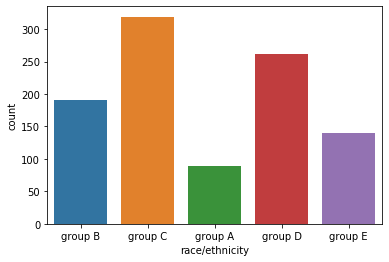

In [4]:
sns.countplot(data["race/ethnicity"])

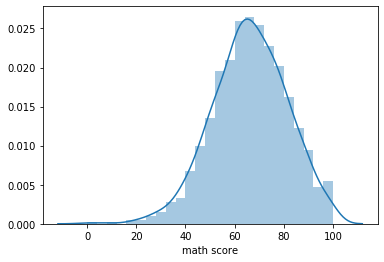

In [5]:
sns.distplot(data["math score"])

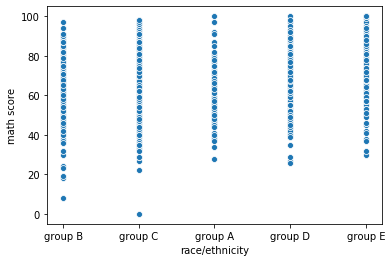

In [6]:
sns.scatterplot(data["race/ethnicity"], data["math score"])

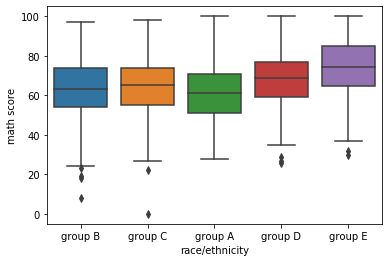

In [7]:
sns.boxplot(data["race/ethnicity"], data["math score"])

In [8]:
math_score = pd.qcut(data['math score'], 4)
ethno = data['race/ethnicity']
math_score.head()

0      (66.0, 77.0]
1      (66.0, 77.0]
2     (77.0, 100.0]
3    (-0.001, 57.0]
4      (66.0, 77.0]
Name: math score, dtype: category
Categories (4, interval[float64]): [(-0.001, 57.0] < (57.0, 66.0] < (66.0, 77.0] < (77.0, 100.0]]

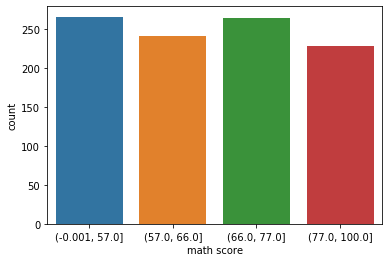

In [9]:
sns.countplot(math_score)

In [10]:
data1 = pd.DataFrame(np.vstack([math_score, ethno]).T, columns=["math score", "ethno"])
data1.head()

,math score,ethno
0,"(66.0, 77.0]",group B
1,"(66.0, 77.0]",group C
2,"(77.0, 100.0]",group B
3,"(-0.001, 57.0]",group A
4,"(66.0, 77.0]",group C


In [11]:
tab1 = pd.crosstab(data1['ethno'], data1['math score'])
tab1

math score,"(-0.001, 57.0]","(57.0, 66.0]","(66.0, 77.0]","(77.0, 100.0]"
ethno,,,,
group A,36,22,18,13
group B,58,54,44,34
group C,89,90,81,59
group D,61,55,83,63
group E,22,20,38,60


In [21]:
statistics_1, p_value_1, C_1 = chisq(tab1)

if p_value_1 >= alpha:
    print('p_value = ', p_value_1, ' > 0.05 => принимаем Н0, данные независимы')
else:
    print('p_value = ', p_value_1, ' < 0.05 => отвергаем Н0, данные зависимы')
    
print('статистика = ', statistics_1)
print('мера Крамера = ', C_1)

p_value =  8.470878393513969e-09  < 0.05 => отвергаем Н0, данные зависимы
статистика =  62.327140665799696
мера Крамера =  0.14413782832853617


In [22]:
# проверка
st, p_v, _, _ = stats.chi2_contingency(tab1, correction=False)

if p_v >= alpha:
    print('p_value = ', p_v, ' > 0.05 => принимаем Н0, данные независимы')
else:
    print('p_value = ', p_v, ' < 0.05 => отвергаем Н0, данные зависимы')
    
print('статистика = ', st)

p_value =  8.47087839351384e-09  < 0.05 => отвергаем Н0, данные зависимы
статистика =  62.32714066579974


**Вывод:** Основываясь на результатах применения критерия можно сделать вывод, что признаки **зависимы**. Значение меры Крамера < 0.3, значит зависимость **слабая**. 

**2. Параметры 'test preparation course' и 'math score'**

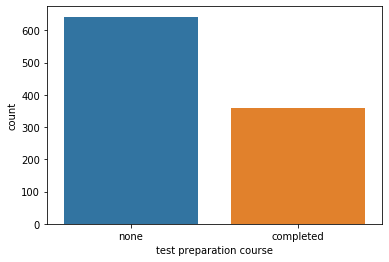

In [23]:
sns.countplot(data["test preparation course"])

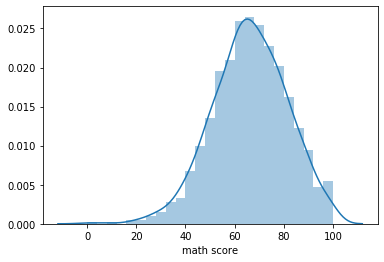

In [24]:
sns.distplot(data["math score"])

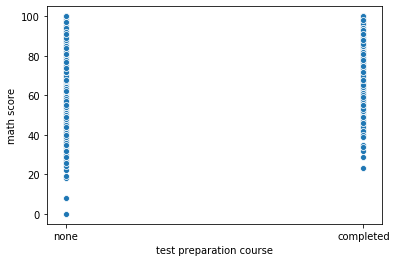

In [25]:
sns.scatterplot(data["test preparation course"], data["math score"])

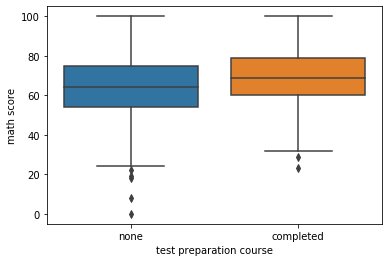

In [27]:
sns.boxplot(data["test preparation course"], data["math score"])

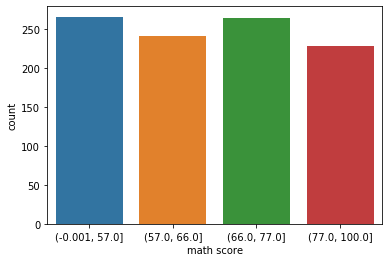

In [31]:
prep = data['test preparation course']
sns.countplot(math_score)

In [32]:
data2 = pd.DataFrame(np.vstack([math_score, prep]).T, columns=["math score", "prep"])
data2.head()

,math score,prep
0,"(66.0, 77.0]",none
1,"(66.0, 77.0]",completed
2,"(77.0, 100.0]",none
3,"(-0.001, 57.0]",none
4,"(66.0, 77.0]",none


In [35]:
tab2 = pd.crosstab(data2['prep'], data2['math score'])
tab2

math score,"(-0.001, 57.0]","(57.0, 66.0]","(66.0, 77.0]","(77.0, 100.0]"
prep,,,,
completed,68,79,104,107
none,198,162,160,122


In [36]:
statistics_2, p_value_2, C_2 = chisq(tab2)

if p_value_2 >= alpha:
    print('p_value = ', p_value_2, ' > 0.05 => принимаем Н0, данные независимы')
else:
    print('p_value = ', p_value_2, ' < 0.05 => отвергаем Н0, данные зависимы')
    
print('статистика = ', statistics_2)
print('мера Крамера = ', C_2)

p_value =  7.64644214887437e-06  < 0.05 => отвергаем Н0, данные зависимы
статистика =  26.458232671350057
мера Крамера =  0.1626598680417209


In [38]:
# проверка
st, p_v, _, _ = stats.chi2_contingency(tab2, correction=False)

if p_v >= alpha:
    print('p_value = ', p_v, ' > 0.05 => принимаем Н0, данные независимы')
else:
    print('p_value = ', p_v, ' < 0.05 => отвергаем Н0, данные зависимы')
    
print('статистика = ', st)

p_value =  7.64644214887437e-06  < 0.05 => отвергаем Н0, данные зависимы
статистика =  26.458232671350057


**Вывод:** Основываясь на результатах применения критерия можно сделать вывод, что признаки **зависимы**. Значение меры Крамера < 0.3, значит зависимость **слабая**. 

**3. Параметры 'gender' и 'math score'**

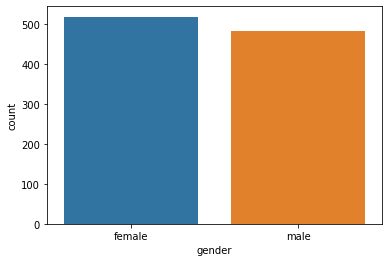

In [40]:
sns.countplot(data["gender"])

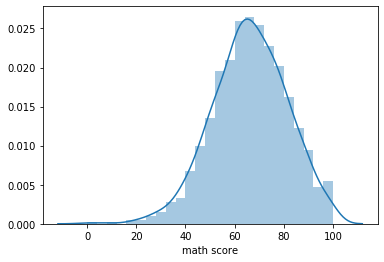

In [41]:
sns.distplot(data["math score"])

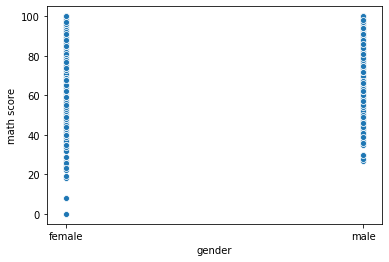

In [42]:
sns.scatterplot(data["gender"], data["math score"])

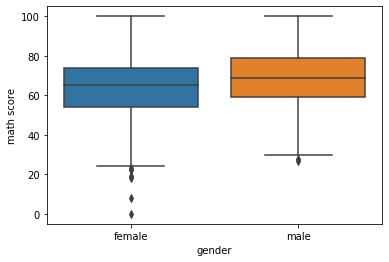

In [43]:
sns.boxplot(data["gender"], data["math score"])

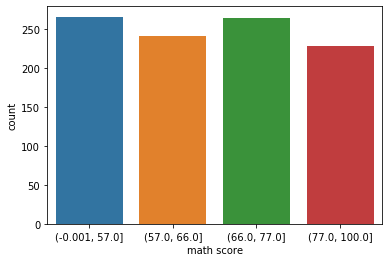

In [44]:
gen = data['gender']
sns.countplot(math_score)

In [50]:
data3 = pd.DataFrame(np.vstack([math_score, gen]).T, columns=["math score", "gender"])
data3.head()

,math score,gender
0,"(66.0, 77.0]",female
1,"(66.0, 77.0]",female
2,"(77.0, 100.0]",female
3,"(-0.001, 57.0]",male
4,"(66.0, 77.0]",male


In [51]:
tab3 = pd.crosstab(data3['gender'], data3['math score'])
tab3

math score,"(-0.001, 57.0]","(57.0, 66.0]","(66.0, 77.0]","(77.0, 100.0]"
gender,,,,
female,163,134,133,88
male,103,107,131,141


In [52]:
statistics_3, p_value_3, C_3 = chisq(tab3)

if p_value_3 >= alpha:
    print('p_value = ', p_value_3, ' > 0.05 => принимаем Н0, данные независимы')
else:
    print('p_value = ', p_value_3, ' < 0.05 => отвергаем Н0, данные зависимы')
    
print('статистика = ', statistics_3)
print('мера Крамера = ', C_3)

p_value =  4.449219470111444e-06  < 0.05 => отвергаем Н0, данные зависимы
статистика =  27.58000159509666
мера Крамера =  0.16607227822576728


In [53]:
# проверка
st, p_v, _, _ = stats.chi2_contingency(tab3, correction=False)

if p_v >= alpha:
    print('p_value = ', p_v, ' > 0.05 => принимаем Н0, данные независимы')
else:
    print('p_value = ', p_v, ' < 0.05 => отвергаем Н0, данные зависимы')
    
print('статистика = ', st)

p_value =  4.449219470111553e-06  < 0.05 => отвергаем Н0, данные зависимы
статистика =  27.58000159509661


**Вывод:** Основываясь на результатах применения критерия можно сделать вывод, что признаки **зависимы**. Значение меры Крамера < 0.3, значит зависимость **слабая**. 